In [1]:
#Importing dependencies
import sqlite3
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Connecting Database instance 
conn = sqlite3.connect('./database/delhi.sqlite')

In [3]:
#Creating the cursor
c = conn.cursor()

In [4]:
#Creating the DataFrame
query = c.execute("SELECT * From delhi_table;")
cols = [column[0] for column in query.description]
df= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
df

,datetime_utc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm
0,19961101-11:00,Haze,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,19961101-16:00,Haze,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0
2,19961101-18:00,Haze,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,North,0.0
3,19961102-02:00,Haze,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,SSW,9.3
4,19961102-03:00,Haze,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,WSW,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80652,20170424-06:00,Haze,17.0,0,0,25.0,1005.0,0,0,34.0,0,0,4.0,320.0,NW,11.1
80653,20170424-09:00,Haze,14.0,0,0,16.0,1003.0,0,0,38.0,0,0,4.0,320.0,NW,22.2
80654,20170424-12:00,Haze,12.0,0,0,14.0,1002.0,0,0,36.0,0,0,4.0,270.0,West,18.5
80655,20170424-15:00,Haze,15.0,0,0,27.0,1004.0,0,0,32.0,0,0,2.0,320.0,NW,3.7


In [5]:
# Extracting the year 
def extract_year(value):
    return (value[0:4])
df["year"] = df["datetime_utc"].apply(lambda x:extract_year(x))

In [6]:
# Extracting month
def extract_month(value):
    return (value[4:6])
df["month"] = df["datetime_utc"].apply(lambda x:extract_month(x))

In [7]:
# Dropping two columns 'datetime_utc', 'wdire'
df = df.drop(['datetime_utc', 'wdire'], axis =1)
df.head()

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm,year,month
0,Haze,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,7.4,1996,11
1,Haze,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,0.0,1996,11
2,Haze,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,0.0,1996,11
3,Haze,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,9.3,1996,11
4,Haze,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,9.3,1996,11


In [8]:
ordered_columns = ['year','month', 'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wspdm', 'conds']
df = df[ordered_columns]

In [9]:
df.head()

,year,month,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm,conds
0,1996,11,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,7.4,Haze
1,1996,11,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,0.0,Haze
2,1996,11,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,0.0,Haze
3,1996,11,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,9.3,Haze
4,1996,11,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,9.3,Haze


In [10]:
df.conds.value_counts()

Haze      65925
Rain       6022
Cloudy     5832
Clear      2878
Name: conds, dtype: int64

In [11]:
# Create our features
X = df.drop("conds", axis=1)

# Create our target
y = df["conds"]
X.describe()

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
count,80657.000000,80657.000000,80657.000000,80657.000000,8.065700e+04,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000
mean,15.676445,0.050907,0.000136,55.171926,2.199730e+03,0.027102,0.000012,26.340045,0.010216,0.000025,2.563318,169.093891,8.976131
std,7.150146,0.219809,0.011677,23.447379,3.558458e+05,0.162383,0.003521,8.242780,0.100558,0.004980,22.690289,118.166457,12.084670
min,-24.000000,0.000000,0.000000,4.000000,-9.999000e+03,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,36.000000,1.001000e+03,0.000000,0.000000,20.000000,0.000000,0.000000,1.800000,60.000000,3.700000
50%,15.000000,0.000000,0.000000,55.000000,1.008000e+03,0.000000,0.000000,28.000000,0.000000,0.000000,2.200000,170.000000,7.400000
75%,22.000000,0.000000,0.000000,74.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.000000,3.000000,270.000000,13.000000
max,35.000000,1.000000,1.000000,100.000000,1.010614e+08,1.000000,1.000000,72.000000,1.000000,1.000000,6436.000000,960.000000,1514.900000


In [12]:
y.value_counts()

Haze      65925
Rain       6022
Cloudy     5832
Clear      2878
Name: conds, dtype: int64

# Split the Data into Training and Testing

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# LogisticRegression

In [14]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
lor_model = LogisticRegression(solver='lbfgs', random_state=1)
lor_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [15]:
lor_model.score(X_train,y_train)

0.8185710507174503

In [16]:
lor_model.score(X_test,y_test)

0.8136870815769899

In [17]:
lor_ypred = lor_model.predict(X_test)
lor_ypred

array(['Haze', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

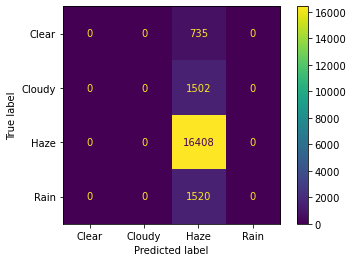

In [18]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lor_cm = confusion_matrix(y_test, lor_ypred, labels=lor_model.classes_)
lor_cm_disp = ConfusionMatrixDisplay(lor_cm, display_labels=lor_model.classes_)
lor_cm_disp.plot()

In [19]:
# Calulating the accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lor_ypred)

0.8136870815769899

In [20]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, lor_ypred)

0.25

In [21]:
# printing the classification report
from sklearn.metrics import classification_report
lor_clf_report = (classification_report(y_test, lor_ypred))
print(lor_clf_report)

              precision    recall  f1-score   support

       Clear       0.00      0.00      0.00       735
      Cloudy       0.00      0.00      0.00      1502
        Haze       0.81      1.00      0.90     16408
        Rain       0.00      0.00      0.00      1520

    accuracy                           0.81     20165
   macro avg       0.20      0.25      0.22     20165
weighted avg       0.66      0.81      0.73     20165



# RandomOverSampling

In [22]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({'Clear': 49517, 'Haze': 49517, 'Cloudy': 49517, 'Rain': 49517})

In [23]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
lor_ros_model = LogisticRegression(solver='lbfgs', random_state=1)
lor_ros_model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [24]:
lor_ros_model.score(X_resampled, y_resampled)

0.4254599430498617

In [25]:
lor_ros_model.score(X_test,y_test)

0.3103396974956608

In [27]:
lor_ros_ypred = lor_ros_model.predict(X_test)
lor_ros_ypred

array(['Clear', 'Cloudy', 'Rain', ..., 'Haze', 'Haze', 'Rain'],
      dtype=object)

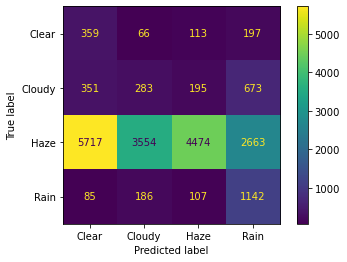

In [28]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lor_ros_cm = confusion_matrix(y_test, lor_ros_ypred, labels=lor_ros_model.classes_)
lor_ros_disp = ConfusionMatrixDisplay(confusion_matrix=lor_ros_cm, display_labels=lor_ros_model.classes_)
lor_ros_disp.plot()

In [29]:
# Calulating the accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lor_ros_ypred)

0.3103396974956608

In [30]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, lor_ros_ypred)

0.42520961926925327

In [31]:
# printing the classification report
from sklearn.metrics import classification_report
lor_ros_clf_report = (classification_report(y_test, lor_ros_ypred))
print(lor_ros_clf_report)

              precision    recall  f1-score   support

       Clear       0.06      0.49      0.10       735
      Cloudy       0.07      0.19      0.10      1502
        Haze       0.92      0.27      0.42     16408
        Rain       0.24      0.75      0.37      1520

    accuracy                           0.31     20165
   macro avg       0.32      0.43      0.25     20165
weighted avg       0.77      0.31      0.38     20165



# RandomUnderSampling

In [32]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'Clear': 2143, 'Cloudy': 2143, 'Haze': 2143, 'Rain': 2143})

In [33]:
from sklearn.linear_model import LogisticRegression
lor_rus_model = LogisticRegression(solver='newton-cg', random_state=1, max_iter=150)
lor_rus_model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=150, random_state=1, solver='newton-cg')

In [34]:
lor_rus_model.score(X_resampled, y_resampled)

0.6565562295846944

In [35]:
lor_rus_model.score(X_test,y_test)

0.6574262335730225

In [36]:
lor_rus_ypred = lor_rus_model.predict(X_test)
lor_rus_ypred

array(['Clear', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

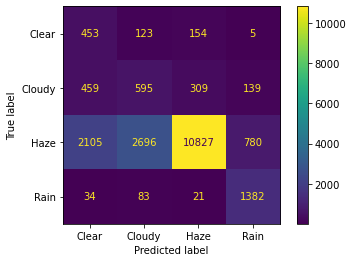

In [38]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lor_rus_cm = confusion_matrix(y_test, lor_rus_ypred, labels=lor_rus_model.classes_)
lor_rus_disp = ConfusionMatrixDisplay(confusion_matrix=lor_rus_cm, display_labels=lor_rus_model.classes_)
lor_rus_disp.plot()

In [39]:
# Calulating the accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lor_rus_ypred)

0.6574262335730225

In [40]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, lor_rus_ypred)

0.6453841455863673

In [41]:
# printing the classification report
from sklearn.metrics import classification_report
lor_rus_clf_report = (classification_report(y_test, lor_rus_ypred))
print(lor_rus_clf_report)

              precision    recall  f1-score   support

       Clear       0.15      0.62      0.24       735
      Cloudy       0.17      0.40      0.24      1502
        Haze       0.96      0.66      0.78     16408
        Rain       0.60      0.91      0.72      1520

    accuracy                           0.66     20165
   macro avg       0.47      0.65      0.50     20165
weighted avg       0.84      0.66      0.72     20165

